# Visualize antibody mix
We will visualize a hypothetical polyclonal antibody mix same way we'd like to visualize the antibody mixes we deconvolve from deep mutational scanning experiments.

The hypothetical mix represents antibodies targeting three major neutralizing "epitopes" on the SARS-CoV-2 receptor-binding domain (RBD) using the classification scheme of [Barnes et al (2020)](https://www.nature.com/articles/s41586-020-2852-1).
In particular, [Barnes et al (2020)](https://www.nature.com/articles/s41586-020-2852-1) divided anti-RBD antibodies that bind to the receptor-binding motif into three classes (see also [Greaney et al (2021)](https://www.nature.com/articles/s41467-021-24435-8)).
For each class, we will use prior deep mutational scanning on a single well-studied monoclonal of that class to antibody to make plausible choices for how mutations affect that antibody class (of course, in reality as there are many somewhat distinct antibodies in each class).
The antibodies used to represent each class are:

  - *LY-CoV016*: class 1, mutation estimates from [Starr et al (2021), Science](https://science.sciencemag.org/content/371/6531/850)
  
  - *LY-CoV555*: class 2, mutation estimates from [Starr et al (2021), Cell Reports Medicine](https://doi.org/10.1016/j.xcrm.2021.100255)
  
  - *REGN10987*: class 3, mutation estimates from [Starr et al (2021), Science](https://science.sciencemag.org/content/371/6531/850)
  
Read in the mutation-level escape values $\beta_{m,e}$ for each mutation against each antibody class for this simulated hypothetical mix:

In [1]:
import pandas as pd

mut_escape_df = pd.read_csv('RBD_mut_escape_df.csv')

mut_escape_df

epitope mutation   escape
0     class 1    N331A  0.08226
1     class 1    N331D  0.77700
2     class 1    N331E  0.08226
3     class 1    N331F  0.08226
4     class 1    N331G  1.70100
...       ...      ...      ...
5791  class 3    T531R  0.72620
5792  class 3    T531S  0.72620
5793  class 3    T531V  0.72480
5794  class 3    T531W  0.72280
5795  class 3    T531Y  0.72620

[5796 rows x 3 columns]

Note that the data frame only includes 1932 of the $201 \times 19 = 3819$ possible amino-acid mutations to the RBD; this is because only about half of the mutations are functionally tolerated.

We also choose simulated activities $a_{\rm{wt},e}$ for each epitope $e$.
We will let the activity of the polyclonal antibody mix be highest against the class 2 epitope, then next highest against the class 3 epitope, and lowest against the class 1 epitope ([experiments suggest](https://www.nature.com/articles/s41467-021-24435-8) this roughly corresponds to reality for SARS-CoV-2 polyclonal sera):

In [2]:
activity_wt_df = pd.read_csv('RBD_activity_wt_df.csv')

activity_wt_df

epitope  activity
0  class 1     1.099
1  class 2     3.178
2  class 3     2.197

Now we will visualize the data using `Polyclonal` class provided by this package to model polyclonal antibody mixes:

In [3]:
import polyclonal

poly_abs = polyclonal.Polyclonal(
                activity_wt_df=activity_wt_df,
                mut_escape_df=mut_escape_df)

print(f"Epitopes: {poly_abs.epitopes}")
print(f"Number of mutations: {len(poly_abs.mutations)}")
print(f"Number of sites: {len(poly_abs.sites)}")

Epitopes: ('class 1', 'class 2', 'class 3')
Number of mutations: 1932
Number of sites: 173


We can access the activity values, the mutation escape values, and site-level summaries of the mutation escape values:

In [4]:
poly_abs.activity_wt_df

epitope  activity
0  class 1     1.099
1  class 2     3.178
2  class 3     2.197

In [5]:
poly_abs.mut_escape_df

epitope  site wildtype mutant mutation   escape
0     class 1   331        N      A    N331A  0.08226
1     class 1   331        N      D    N331D  0.77700
2     class 1   331        N      E    N331E  0.08226
3     class 1   331        N      F    N331F  0.08226
4     class 1   331        N      G    N331G  1.70100
...       ...   ...      ...    ...      ...      ...
5791  class 3   531        T      R    T531R  0.72620
5792  class 3   531        T      S    T531S  0.72620
5793  class 3   531        T      V    T531V  0.72480
5794  class 3   531        T      W    T531W  0.72280
5795  class 3   531        T      Y    T531Y  0.72620

[5796 rows x 6 columns]

In [6]:
poly_abs.mut_escape_site_summary_df

epitope  site wildtype      mean  total positive     max      min  \
0    class 1   331        N  0.550628         8.81004  2.6200  0.08226   
1    class 1   332        I  0.985396        18.72252  3.2970  0.08226   
2    class 1   333        T  0.553920         9.97056  2.6030  0.08226   
3    class 1   334        N  0.664236        11.95624  1.8080  0.08226   
4    class 1   335        L  0.364102         6.91794  1.5980  0.08226   
..       ...   ...      ...       ...             ...     ...      ...   
514  class 3   527        P  0.737635        12.53980  0.9469  0.72330   
515  class 3   528        K  0.724661        13.04390  0.7267  0.72380   
516  class 3   529        K  0.724067        13.03320  0.7257  0.71940   
517  class 3   530        S  0.724747        13.77020  0.7349  0.72280   
518  class 3   531        T  0.724489        13.76530  0.7262  0.72090   

     total negative  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
..              ...  
514             0.0  
515             0.0  
516             0.0  
517             0.0  
518             0.0  

[519 rows x 8 columns]

We can also **plot** the relevant values characterizing the polyclonal mix.

Here is the activity $a_{\rm{wt},e}$ against each epitope for the unmutated protein:

In [7]:
# NBVAL_IGNORE_OUTPUT

poly_abs.activity_wt_barplot()

alt.Chart(...)

Here is the mutation escape $\beta_{m,e}$ for each epitope at each site.
For compact site-level plotting, the mutation escape at each site is summarized by a single number (e.g., as the mean or total of the $\beta_{m,e}$ for that site).
Note that you can zoom on specific sites, and use the dropdown at the bottom of the plot to select different summary metrics of the escape at each site: 

In [8]:
# NBVAL_IGNORE_OUTPUT

poly_abs.mut_escape_lineplot()

alt.VConcatChart(...)

If we want to actually interrogate the effect of each single mutation on escape, we can look at the actual $\beta_{m,e}$  in the form of a heatmap.
Note that the heatmap is again zoomable, and you can mouse over specific mutations to get the value:

In [9]:
# NBVAL_IGNORE_OUTPUT

poly_abs.mut_escape_heatmap()

alt.VConcatChart(...)

We can also project the site-level summary metrics of the mutation escape onto the protein structure.
Here we do this using [PDB 6m0j](https://www.rcsb.org/structure/6M0J), which holds the SARS-CoV-2 RBD (chain `E`) in complex with ACE2 (chain `A`).
Specific, the `Polyclonal` object has a method to make versions of the PDB in which the B-factor is re-assigned to one of the site-level summary metrics of escape (such as *mean* or *total positive*):

In [10]:
poly_abs.mut_escape_pdb_b_factor(input_pdbfile='6M0J.pdb',
                                 chains='E',
                                 metric='mean',
                                 outfile='RBD_{metric}_{epitope}.pdb')

epitope              PDB file
0  class 1  RBD_mean_class_1.pdb
1  class 2  RBD_mean_class_2.pdb
2  class 3  RBD_mean_class_3.pdb

These PDB files can then be colored in `pymol` by the escape metric.
If you want the colors to match the same ones used above by the plotting from the `Polyclonal` object, get the colors and convert them to the RGB tuples used by `pymol`:

In [11]:
import matplotlib.colors

for epitope, hex_color in poly_abs.epitope_colors.items():
    rgb = [round(val, 3) for val in matplotlib.colors.to_rgb(hex_color)]
    print(f"{epitope}: hex color is {hex_color}; RGB tuple is {rgb}")

class 1: hex color is #1f77b4; RGB tuple is [0.122, 0.467, 0.706]
class 2: hex color is #ff7f0e; RGB tuple is [1.0, 0.498, 0.055]
class 3: hex color is #2ca02c; RGB tuple is [0.173, 0.627, 0.173]


Then using these colors, we can use the `pymol spectrum` command to re-color by B-factor.
Here is a Python script that can be run within `pymol` (via `run <script>`) to color the ACE2 within the PDB files so that sites in the RBD are colored according to the extent of mutant escape at that site files, with the key helices in ACE2 shown as gray cartoons:

    epitope_colors = {'class_1': [0.122, 0.467, 0.706],
                      'class_2': [1.0, 0.498, 0.055],
                      'class_3': [0.173, 0.627, 0.173],
                      }

    for epitope, max_color in epitope_colors.items():
        cmd.reinitialize()
        infile = f"mean-{epitope}.pdb"
        cmd.load(infile)
        cmd.bg_color('white')
        cmd.hide('everything')
        cmd.show('cartoon', '(chain A) and resi 18-85')
        cmd.color('gray', 'chain A')
        cmd.set('cartoon_transparency', 0.4, 'chain A')
        cmd.show('spheres', 'chain E')
        cmd.set_color('max_color', epitope_colors[epitope])
        cmd.spectrum('b', 'white max_color', 'chain E')
        cmd.set_view([0.08, -0.9, -0.3,
                      -0.9, -0.2, 0.3,
                      -0.4, 0.3, -0.9,
                      0.0, 0.0, -160.8,
                      -32.5, 25.9, 21.2,
                      87.8, 194.5, -20.0])
        outfile = os.path.splitext(infile)[0] + '.png'
        cmd.png(outfile, ray=1)
        
Here are the images that result if `pymol` is used to run the above script in the same directory to which we wrote the B-factor recolored PDB files:


class 1:


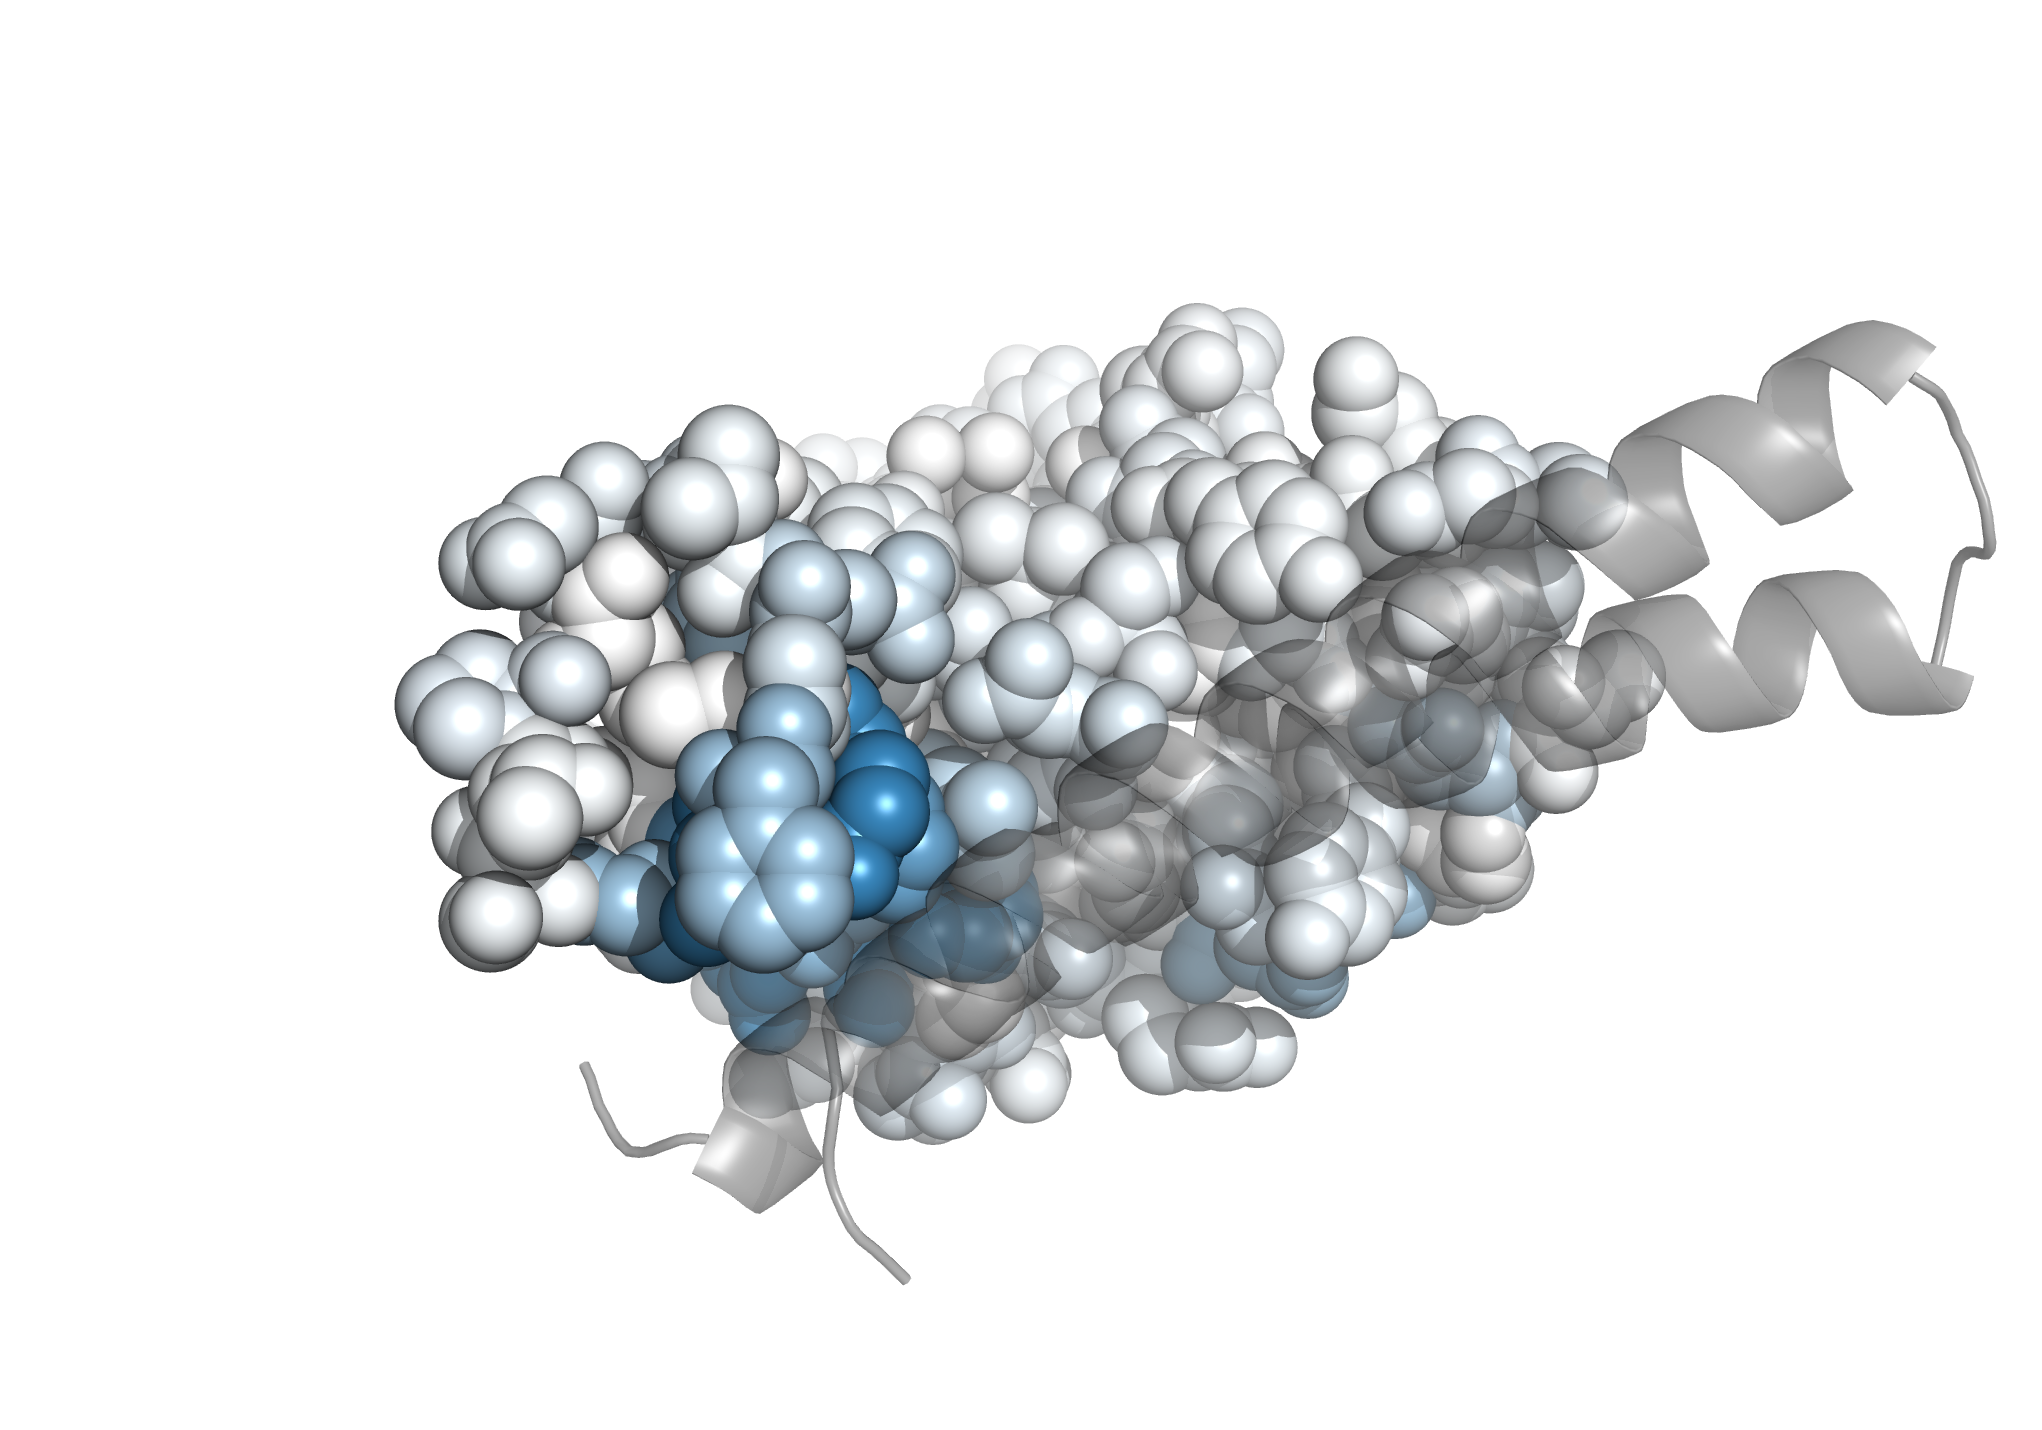


class 2:


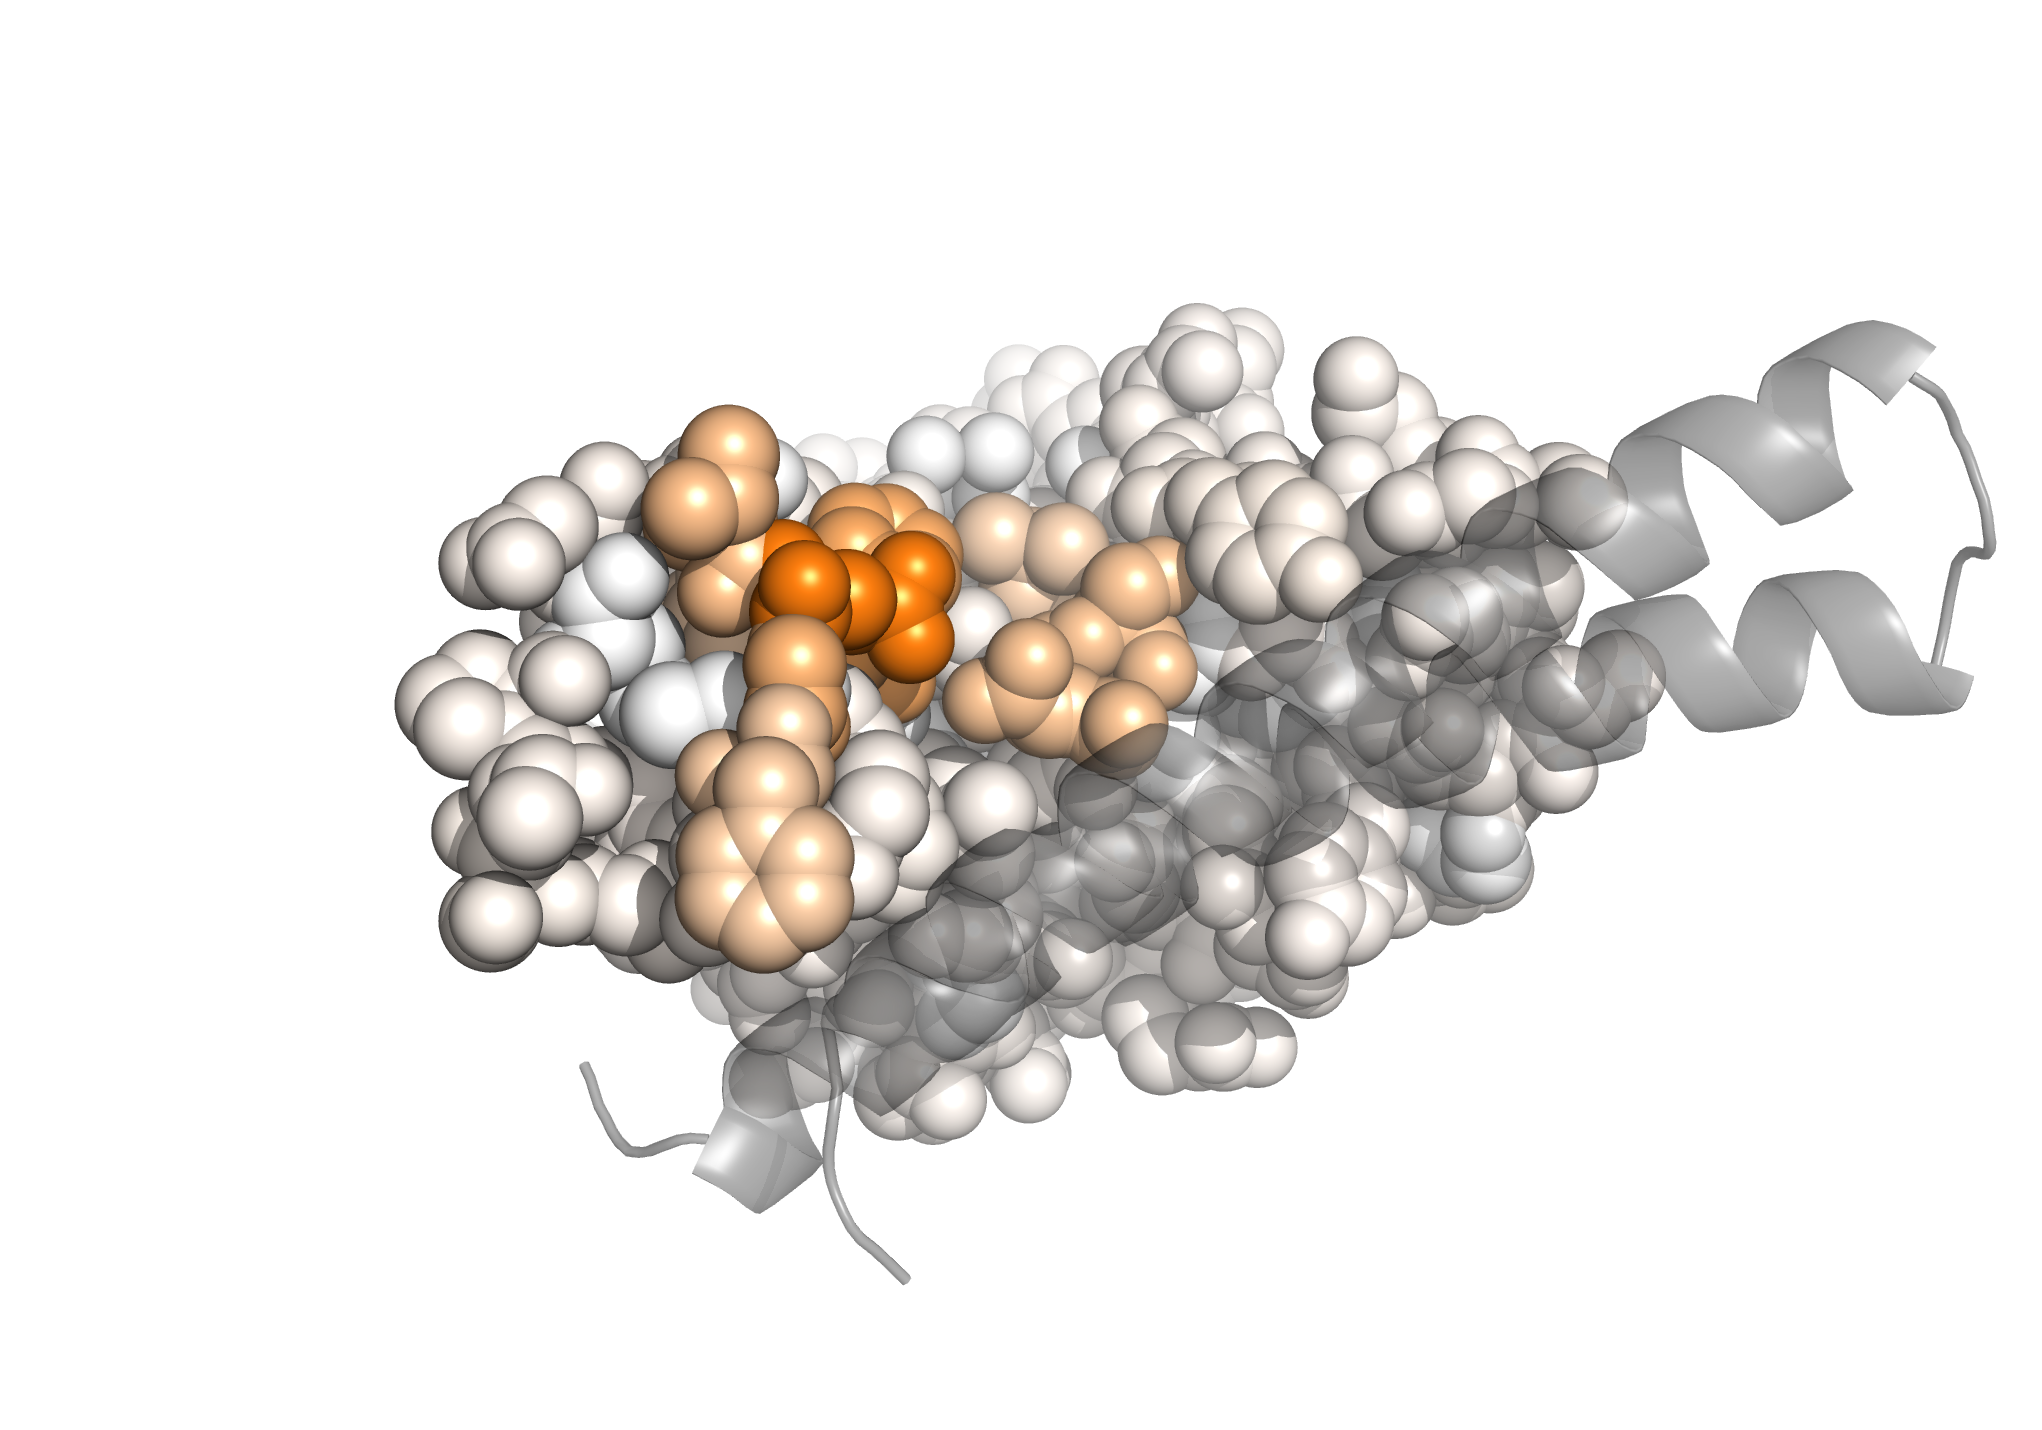


class 3:


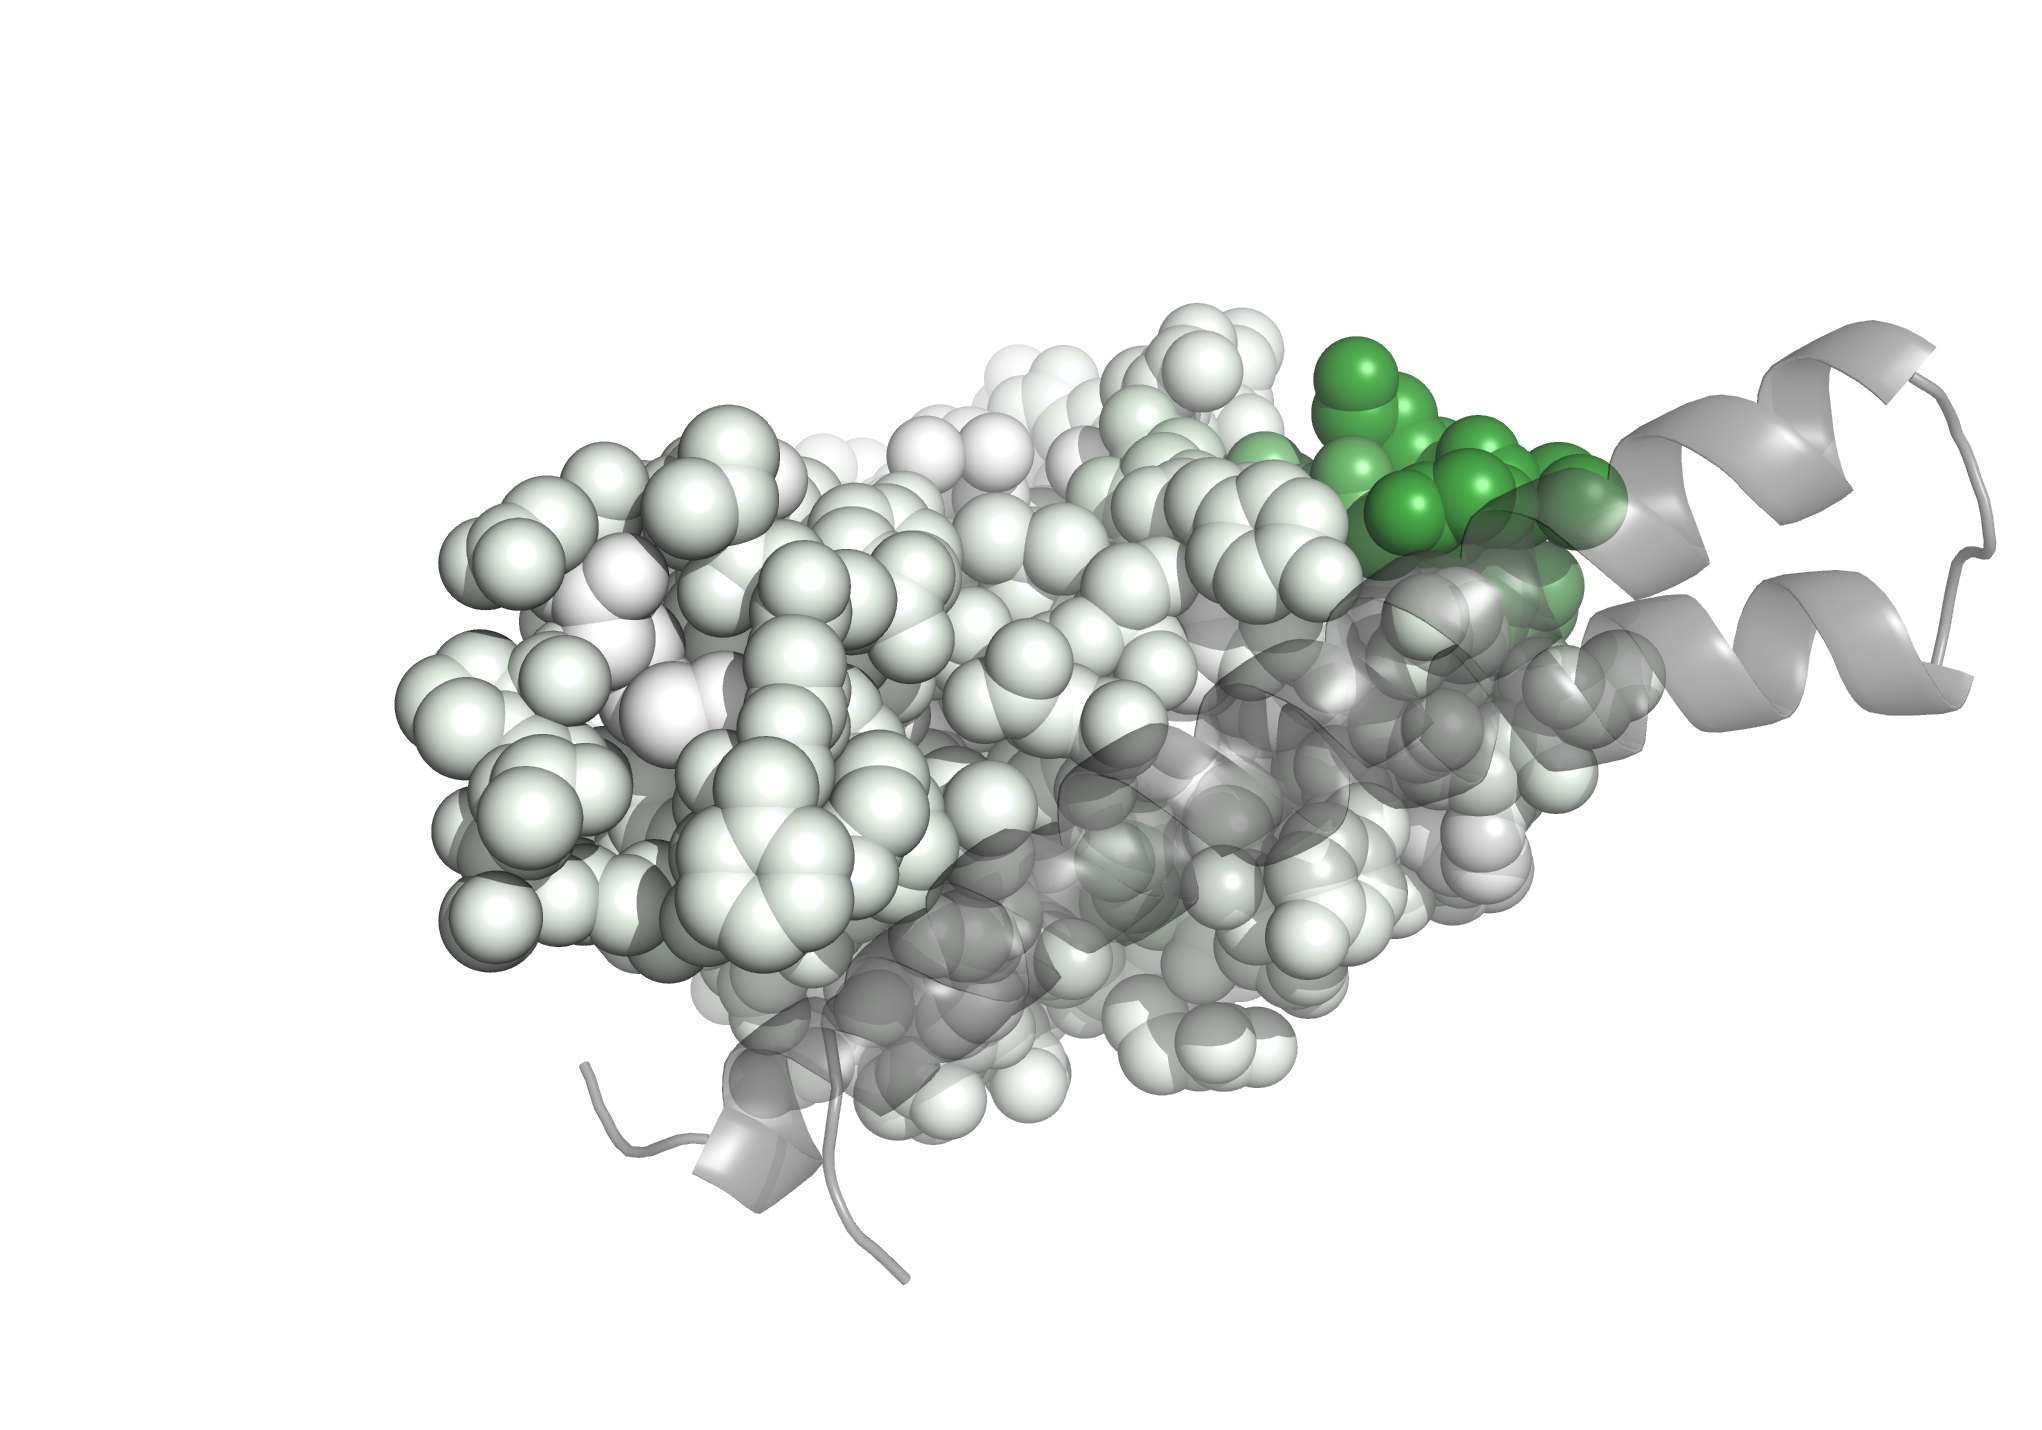

In [12]:
from IPython.display import display, Image

for epitope in poly_abs.epitopes:
    print(f"\n{epitope}:")
    png = f"RBD_mean_{epitope.replace(' ', '_')}.png"
    display(Image(png, width=400))